# Домашнее задание 2
## Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии. Не забывайте комментировать код, чтобы было понятно, что вы делаете.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

⚠️ Данное домашнее задание является облегченной версией домашнего задания, которое дается на курсе [Машинное обучение](https://github.com/Murcha1990/ML_AI24) на программе "Искусственный интеллект". Права на изменение и применение получены. Исходник домашнего задания (base и pro) сочетает самые разные прикладные стороны обучения моделей и рекомендуется каждому к изучению. 

Всего можно набрать 24,5 балла. В пересчете на 10 балльную систему - это 10 баллов.

**Дедлайн:** до 09:00 (утра) 08.12.2025

**Формат сдачи:** файл ipynb, название файла должно быть в виде: Фамилия_БСЦ_Группа_HW2.ipynb. За неправильно названный файл полагается штраф. Сдача ДЗ ассистенту в личку Telegram: @snovasash 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Ответ: для воспроизводимости результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [2]:
try:
    df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
    df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
except:
    df_train = pd.read_csv('../data/cars_train.csv')
    df_test = pd.read_csv('../data/cars_test.csv')


print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [3]:
# Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
# Отобразите первые 5 
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
# и последние 5 объектов тестового датасета (0.1 балла)
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
def check_df(df, df_name):
    print(df_name)
    print('Доля пропусков')
    na_stat = df.isna().mean()
    print(na_stat[na_stat > 0])
    print('Кол-во явных дубликатов:', sum(df.duplicated()))
    print()

check_df(df_train, 'df_train')
check_df(df_test, 'df_test')

df_train
Доля пропусков
mileage      0.028861
engine       0.028861
max_power    0.028004
torque       0.029004
seats        0.028861
dtype: float64
Кол-во явных дубликатов: 985

df_test
Доля пропусков
mileage      0.019
engine       0.019
max_power    0.019
torque       0.019
seats        0.019
dtype: float64
Кол-во явных дубликатов: 62




### **Задание 2 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [7]:
def prep_df(df):
    df = df.copy()
    df.loc[df['max_power'].astype(str).str.split().str.len() == 1, 'max_power'] = np.nan


    df['mileage'] = df['mileage'].astype(str).apply(lambda x: x.split()[0])
    df['engine'] = df['engine'].astype(str).apply(lambda x: x.split()[0])
    df['max_power'] = df['max_power'].astype(str).apply(lambda x: x.split()[0])

    df['mileage'] = df['mileage'].astype(float)
    df['engine'] = df['engine'].astype(float)
    df['max_power'] = df['max_power'].astype(float)

    df = df.drop(columns=['torque'])

    return df

df_train = prep_df(df_train)
df_test = prep_df(df_test)

В предыдущем задании мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [8]:
na_cols = df_train.columns[df_train.isna().sum() > 0]
na_cols_medians = df_train[na_cols].median()

df_train[na_cols] = df_train[na_cols].fillna(na_cols_medians)
df_test[na_cols]  = df_test[na_cols].fillna(na_cols_medians)

print(df_train.isna().sum())
print(df_test.isna().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


### **Задание 3 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [9]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 4 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [10]:
feature_cols = [col for col in df_train.columns if col != 'selling_price']

print('Кол-во объектов с одинаковым признаковым описанием:', df_train.duplicated(subset=feature_cols, keep=False).sum())
df_train[df_train.duplicated(subset=feature_cols, keep=False)].sort_values(by=feature_cols)

Кол-во объектов с одинаковым признаковым описанием: 1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968,174.33,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968,174.33,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967,241.40,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967,241.40,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968,188.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5.0


In [11]:
df_train = df_train.drop_duplicates(subset=feature_cols, keep='first').reset_index(drop=True)

In [12]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0


In [13]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

**Моё примечание:** Сначала рассмотрим статистики после заполнения пропусков

In [14]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.952905,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.577030,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [15]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [16]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [17]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


**Моё примечание:** Теперь рассмотрим статистики до заполнения пропусков

In [18]:
try:
    df_train_raw = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
    df_test_raw = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
except:
    df_train_raw = pd.read_csv('../data/cars_train.csv')
    df_test_raw = pd.read_csv('../data/cars_test.csv')

df_train_raw = prep_df(df_train_raw)
df_test_raw = prep_df(df_test_raw)

In [19]:
df_train_raw.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000,6797.000000,6796.000000,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,19.426604,1458.327203,91.580806,5.419008
std,4.053095,8.089419e+05,5.772400e+04,4.045692,501.183890,35.734052,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [20]:
df_train_raw.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,6999,6999,6999,6999,6999
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,116,3793,5826,6095,4587


In [21]:
df_test_raw.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,981.000000,981.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1458.882773,91.015627,5.410805
std,4.012149,7.585539e+05,48486.218662,3.989872,526.228560,35.207383,0.919985
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.000000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


In [22]:
df_test_raw.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

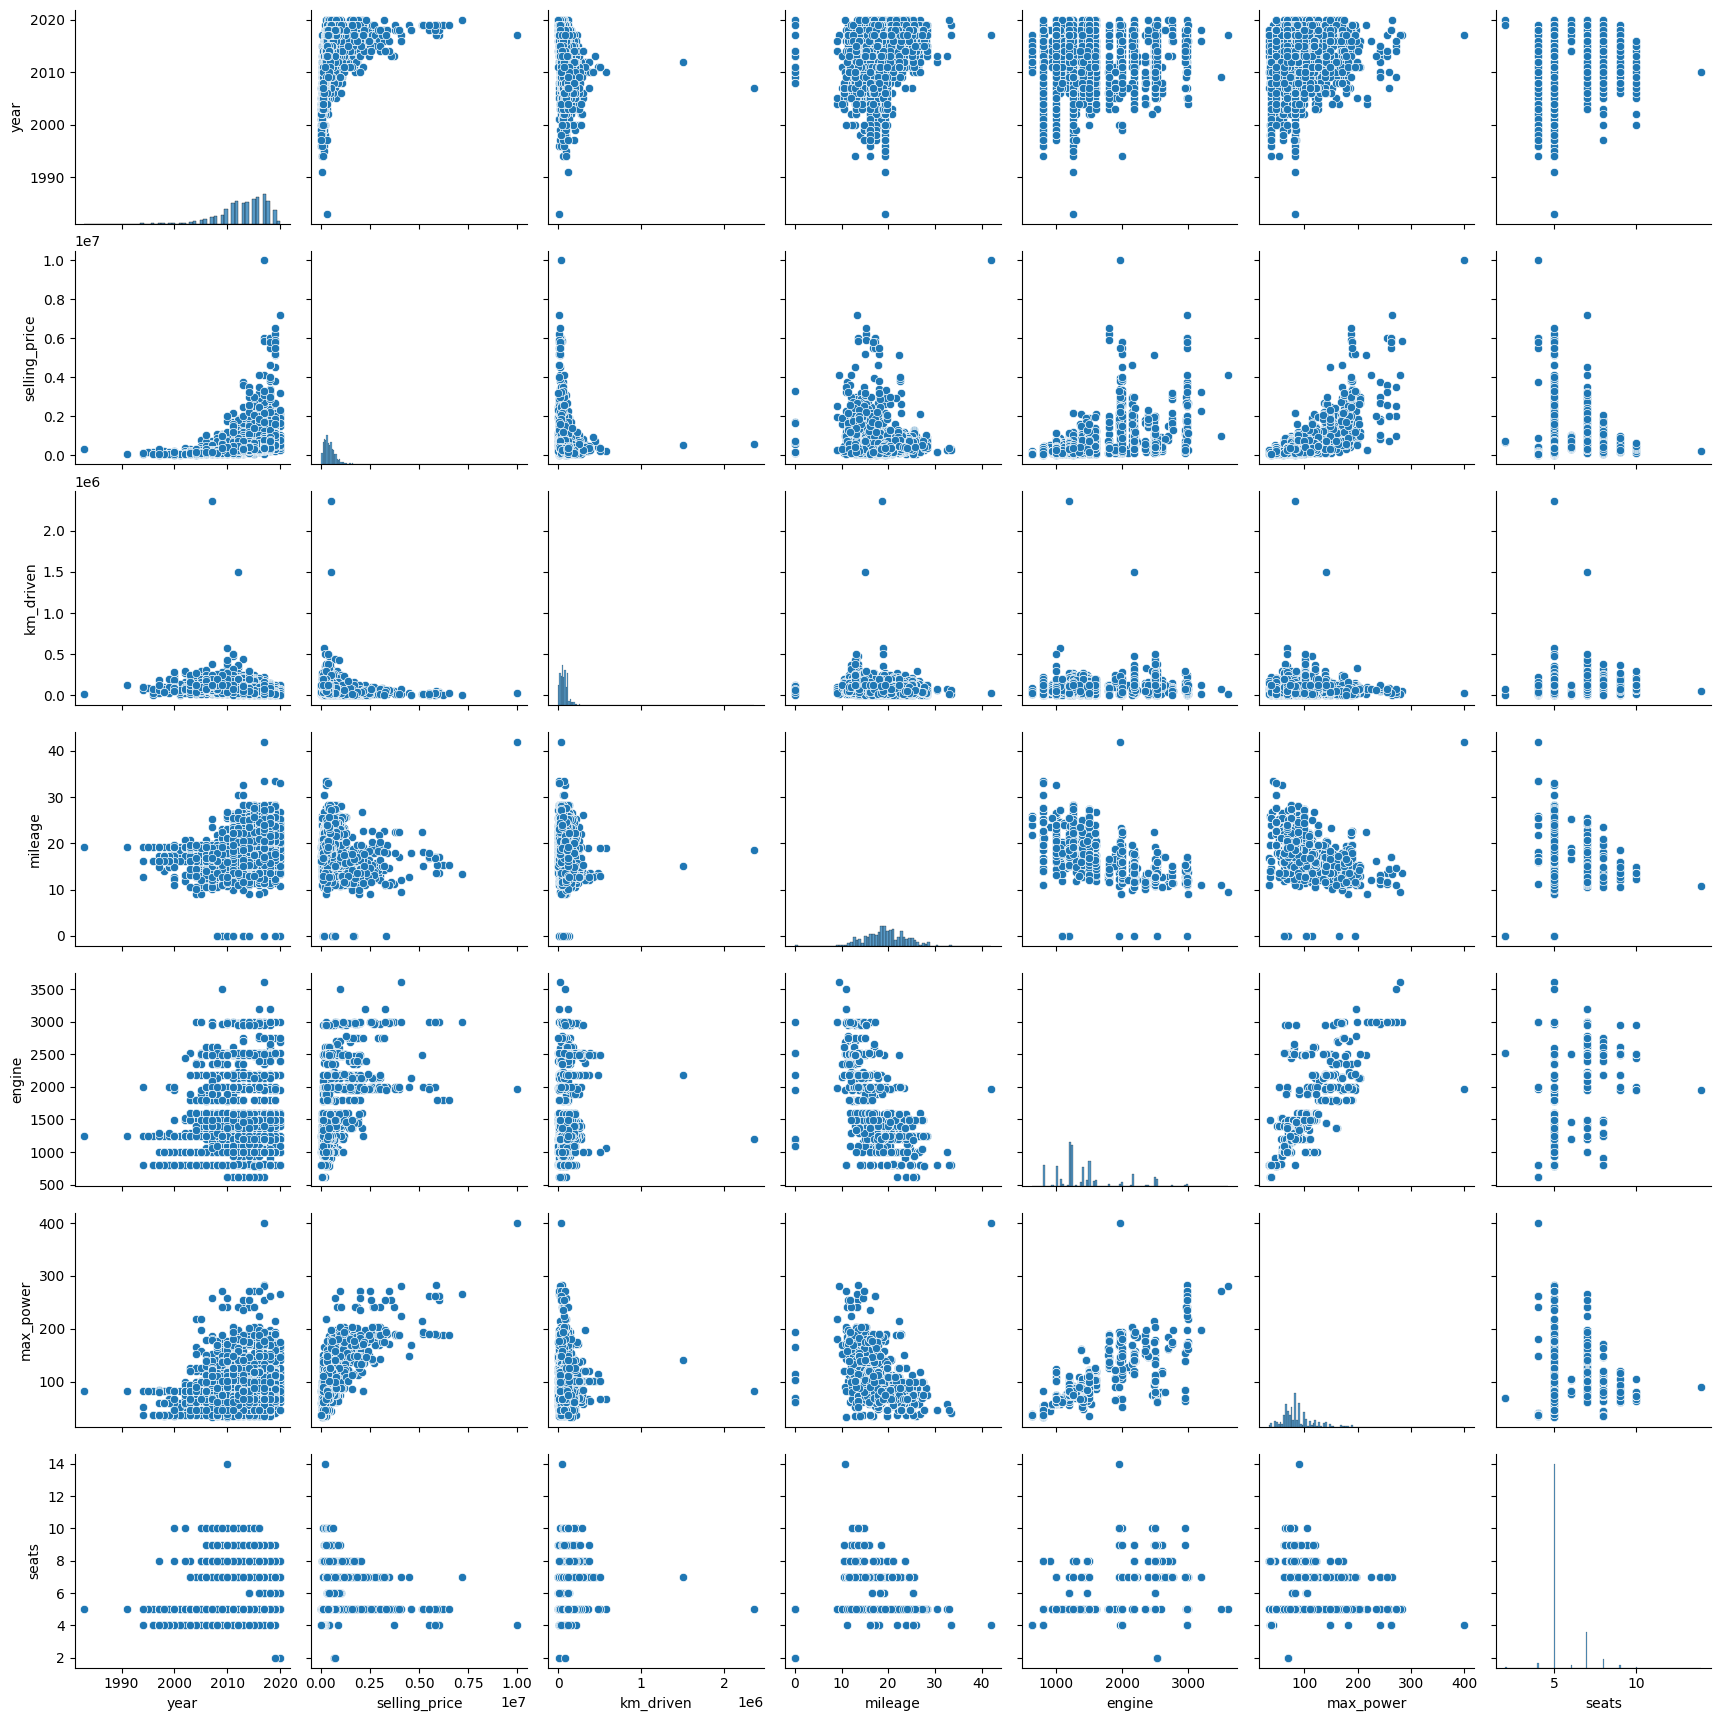

In [23]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_train[num_cols])
plt.show()

**Мой комментарий по шагу 1:** 
Зависимости с таргетом есть.
- `max_power` (выраженная положительная нелинейная зависимость)
- `engine` (положительная зависимость)
- `year` (более новые авто имеют выше цену)
- `km_driven` (выраженная отрицательная зависимость)

Кроме того, можно предположить связь между признаками. 

В частности, между признаками `engine` и `max_power`, которые имеют сильную положительную зависимость

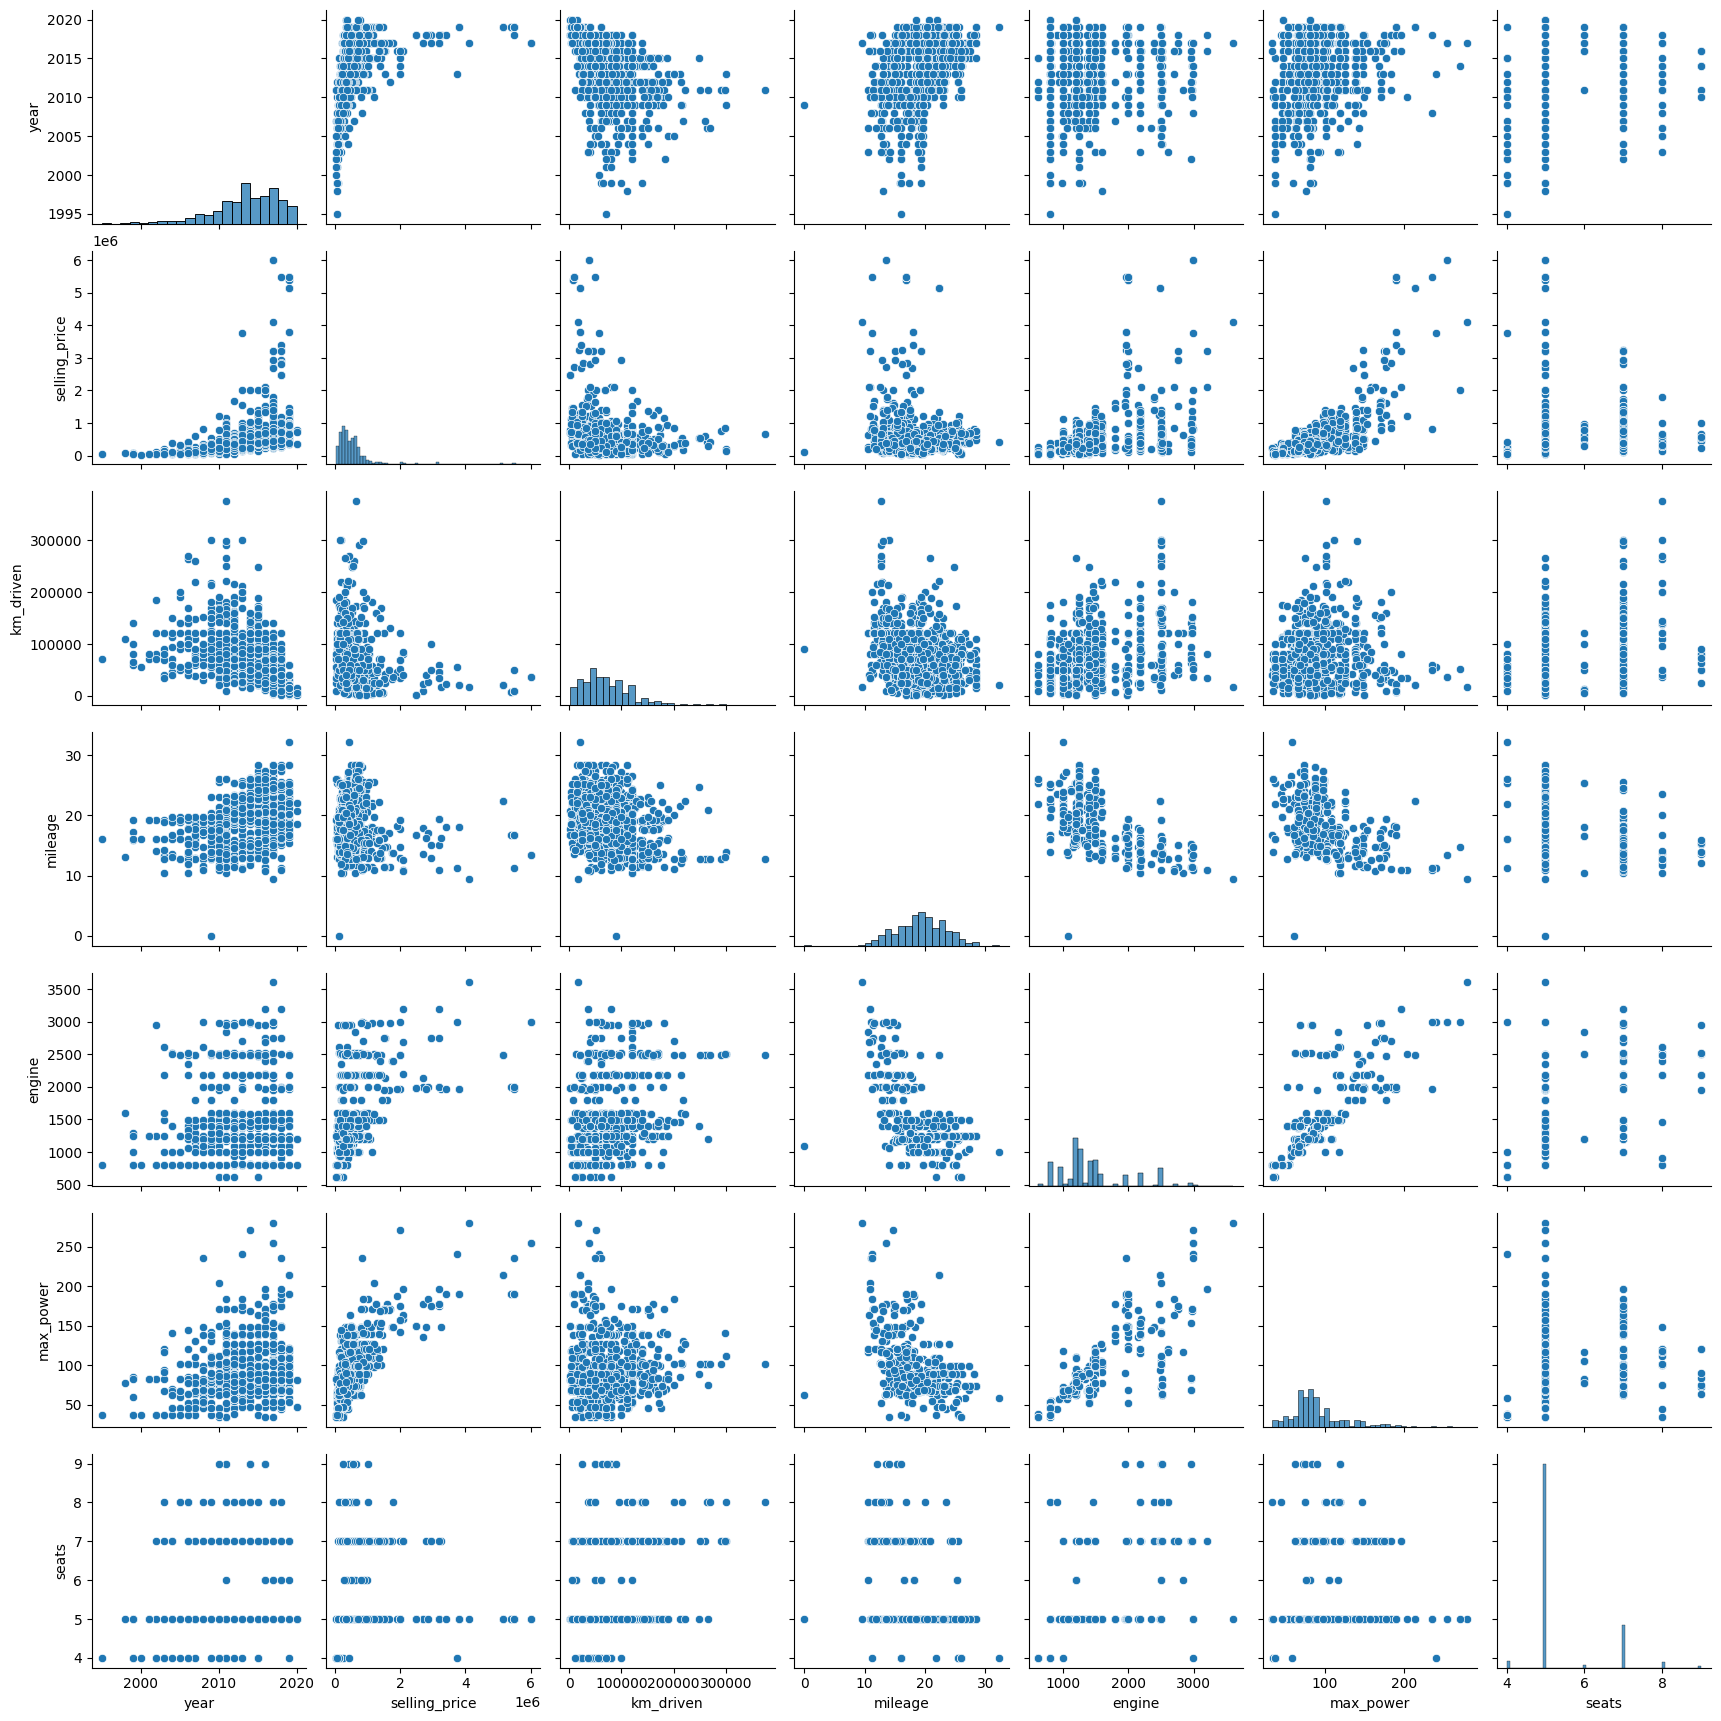

In [24]:
sns.pairplot(df_test[num_cols])
plt.show()

**Мой комментарий по Шагу 2:** распределения Train и Test очень сильно похожи, поэтому считаем, что разбиение на выборки было выполнено корректно.

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


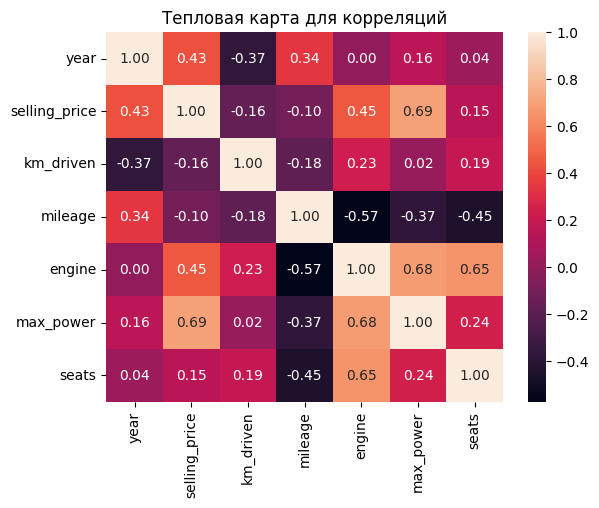

In [25]:
corr = df_train[num_cols].corr(method='pearson')

sns.heatmap(corr, fmt='.2f', annot=True)
plt.title('Тепловая карта для корреляций')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Мои ответы**
- `year` и `engine` имеют самую слабую скоррелированность
- Сильная положительная линейная зависимость есть у следующих пар признаков:
    - `selling_price` и `max_power`
    - `engine` и `seats`
    - `engine` и `max_power`
- Такую гипотезу действительно можно выдвинуть, но стоит помнить о том, что корреляция не означает причинности. Тем не менее, чем меньше год выпуска, тем больше проехала машина

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [26]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats            float64
dtype: object

In [27]:
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
df_train_num = df_train[num_cols + ['selling_price']].copy()
df_test_num  = df_test[num_cols + ['selling_price']].copy()

In [28]:
X_train = df_train_num[num_cols]
y_train = df_train_num['selling_price']

In [29]:
X_train.shape

(5840, 6)

In [30]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [31]:
X_test = df_test_num[num_cols]
y_test = df_test_num['selling_price']

In [32]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'r2_score_train: {r2_score_train:.2f}')
print(f'r2_score_test: {r2_score_test:.2f}')
print(f'mse_train: {mse_train:.2f}')
print(f'mse_test: {mse_test:.2f}')

r2_score_train: 0.59
r2_score_test: 0.59
mse_train: 116600313590.75
mse_test: 233001116120.29


**Мой комментарий:**
1. Полученная модель объясняет 59% дисперсии таргета и на тренировочной, и на тестовой выборке, в целом, переобучения нет.
2. Ошибка $MSE$ на тесте примерно в 2 раза больше, чем на трейне

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'r2_score_train: {r2_score_train:.2f}')
print(f'r2_score_test: {r2_score_test:.2f}')
print(f'mse_train: {mse_train:.2f}')
print(f'mse_test: {mse_test:.2f}')

r2_score_train: 0.59
r2_score_test: 0.59
mse_train: 116600313590.75
mse_test: 233001116120.28


**Мой комментарий:** `StandardScaler` не изменил качество линейной регрессии

### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [35]:
pd.Series(lr.coef_, index=X_train.columns).abs().sort_values(ascending=False)

max_power    324472.011677
year         152311.799138
engine        59328.013817
km_driven     44056.812930
mileage       29281.438343
seats         22166.757806
dtype: float64

**Ответ:** `max_power` - самый информативный

### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_score_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f'r2_score_train: {r2_score_train_lasso:.2f}')
print(f'r2_score_test: {r2_score_test_lasso:.2f}')
print(f'mse_train: {mse_train_lasso:.2f}')
print(f'mse_test: {mse_test_lasso:.2f}')

r2_score_train: 0.59
r2_score_test: 0.59
mse_train: 116600313600.88
mse_test: 233001786510.72


In [37]:
pd.Series(lasso.coef_, index=X_train.columns)

year         152311.617852
km_driven    -44055.683250
mileage       29279.557726
engine        59323.171124
max_power    324472.904976
seats        -22163.875074
dtype: float64

**Мой ответ:** 
1. Lasso-модель не дала заметного прироста качества судя по метрикам
2. Регуляризация не занулила веса. Предположительно из-за масштаба таргета, параметров Lasso по умолчанию не хватает.

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 100, 1000, 3000, 5000]}

lasso = Lasso()

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=10)
grid.fit(X_train_scaled, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [0.1, 100, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5000


In [39]:
grid.best_params_['alpha']

5000

In [40]:
lasso_best = grid.best_estimator_

y_train_pred_lasso = lasso_best.predict(X_train_scaled)
y_test_pred_lasso = lasso_best.predict(X_test_scaled)

r2_score_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f'r2_score_train: {r2_score_train_lasso:.2f}')
print(f'r2_score_test: {r2_score_test_lasso:.2f}')
print(f'mse_train: {mse_train_lasso:.2f}')
print(f'mse_test: {mse_test_lasso:.2f}')

r2_score_train: 0.59
r2_score_test: 0.59
mse_train: 116848066714.77
mse_test: 236594664497.66


In [41]:
pd.Series(lasso_best.coef_, index=X_train.columns)

year         151307.300415
km_driven    -38487.725609
mileage       20070.734917
engine        35490.391963
max_power    328813.795152
seats         -7861.765428
dtype: float64

Регуляризация не улучшает модель при текущем наборе признаков.

**Мой ответ по задаче 1:**
1. 50 моделей
2. Регуляризация не занулила ни один признак

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [42]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 3000, 5000],
    'l1_ratio': [0.1, 0.5, 0.9]
}
grid_en = GridSearchCV(ElasticNet(), param_grid, scoring='r2', cv=10)
grid_en.fit(X_train_scaled, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.01, 0.05, ...], 'l1_ratio': [0.1, 0.5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [43]:
elastic_best = grid_en.best_estimator_

y_train_pred = elastic_best.predict(X_train_scaled)
y_test_pred = elastic_best.predict(X_test_scaled)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'r2_score_train: {r2_score_train:.2f}')
print(f'r2_score_test: {r2_score_test:.2f}')
print(f'mse_train: {mse_train:.2f}')
print(f'mse_test: {mse_test:.2f}')


r2_score_train: 0.59
r2_score_test: 0.57
mse_train: 117545415815.49
mse_test: 244329889578.72


Ошибка на тесте выросла по сравнению с Lasso

**Мой ответ по задаче 2:**
1. 150 моделей
2. Лучшие гиперпараметры
    - alpha = 0.1
    - l1_ratio = 0.1

# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [44]:
df_train = df_train.drop(columns=['name'])
df_test = df_test.drop(columns=['name'])

In [45]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_cols = df_train.columns[~df_train.columns.isin(cat_cols + ['selling_price'])]

X_train_full = pd.concat([df_train[num_cols], df_train[cat_cols]], axis=1)
X_test_full = pd.concat([df_test[num_cols], df_test[cat_cols]], axis=1)

In [46]:
X_train_full = df_train.drop(columns=['selling_price'])
X_test_full = df_test.drop(columns=['selling_price'])

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [47]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

ohe = OneHotEncoder(drop='first')

X_train_ohe = ohe.fit_transform(X_train_full[cat_cols])
X_test_ohe = ohe.transform(X_test_full[cat_cols])

In [48]:
X_train_num = X_train_full[num_cols].values
X_test_num = X_test_full[num_cols].values

X_train_all = np.hstack([X_train_num, X_train_ohe.toarray()])
X_test_all = np.hstack([X_test_num, X_test_ohe.toarray()])

scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_test_all_scaled = scaler.transform(X_test_all)

### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.1, 0.15, 1, 10, 100, 1000]}

ridge = Ridge()
grid_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10)

grid_ridge.fit(X_train_all_scaled, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.001, 0.1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1000


In [50]:
ridge_best = grid_ridge.best_estimator_

In [51]:
y_train_pred = ridge_best.predict(X_train_all_scaled)
y_test_pred = ridge_best.predict(X_test_all_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'r2_score_train: {r2_train:.2f}')
print(f'r2_score_test: {r2_test:.2f}')
print(f'mse_train: {mse_train:.2f}')
print(f'mse_test: {mse_test:.2f}')

r2_score_train: 0.66
r2_score_test: 0.60
mse_train: 97915261603.56
mse_test: 228104093629.44


**Мой ответ:** ура, качество выросло, есть, конечно, переобучение, но тем не менее, качество стало лучше на обеих выборках

# **Часть 4 (7 баллов) | Классификация**



In [52]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [53]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

model = LogisticRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [55]:
print('roc_auc_score: ', roc_auc_score(y_test, y_test_proba))
print('pr_auc: ', average_precision_score(y_test, y_test_proba))

roc_auc_score:  0.9259023377910034
pr_auc:  0.9249757664368783


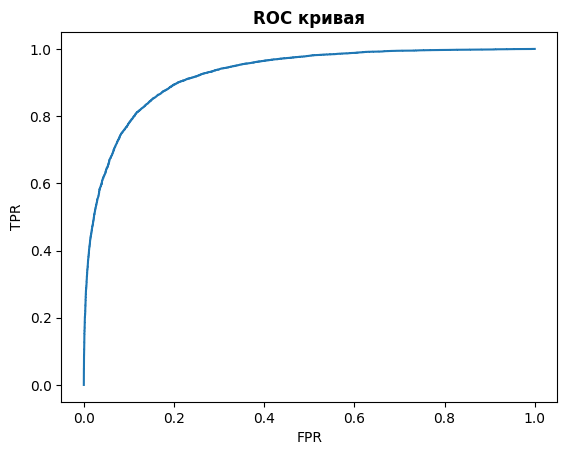

In [56]:
FPR, TPR, _ = roc_curve(y_test, y_test_proba)

plt.plot(FPR, TPR)
plt.title("ROC кривая", fontweight='bold')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

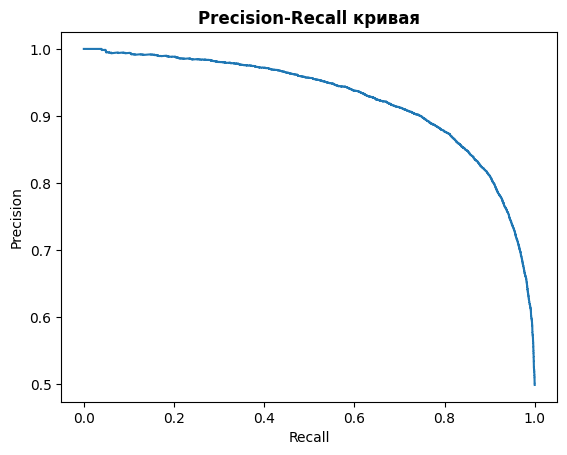

In [57]:
p, r, _ = precision_recall_curve(y_test, y_test_proba)
plt.plot(r, p)
plt.title("Precision-Recall кривая", fontweight='bold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка train). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет. (Датасет в чате ТГ)

In [58]:
data = pd.read_csv('../data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]

/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("train")
print("accuracy_score:", accuracy_score(y_train, y_train_pred))
print("precision_score:", precision_score(y_train, y_train_pred))
print("recall_score:", recall_score(y_train, y_train_pred))
print("roc_auc_score:", roc_auc_score(y_train, y_train_proba))
print("f1_score:", f1_score(y_train, y_train_pred))

print()
print("test")
print("accuracy_score:", accuracy_score(y_test, y_test_pred))
print("precision_score:", precision_score(y_test, y_test_pred))
print("recall_score:", recall_score(y_test, y_test_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_test_proba))
print("f1_score:", f1_score(y_test, y_test_pred))

train
accuracy_score: 0.9635150545289592
precision_score: 0.0
recall_score: 0.0
roc_auc_score: 0.6086741953584069
f1_score: 0.0

test


/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


accuracy_score: 0.9637021916450358
precision_score: 0.0
recall_score: 0.0
roc_auc_score: 0.6100041680908589
f1_score: 0.0


**Мой комментарий:** модель плохая, из-за дисбаланса классов всем объектам предсказывается один и тот же класс

### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [61]:
data.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [62]:
cat_cols = [c for c in X_train.columns if '_cat' in c]
num_cols = [c for c in X_train.columns if c not in cat_cols]

ohe = OneHotEncoder(drop='first')
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

X_train_final = np.hstack([X_train_num, X_train_cat.toarray()])
X_test_final = np.hstack([X_test_num, X_test_cat.toarray()])

In [63]:
%%time
model = LogisticRegression()
model.fit(X_train_final, y_train)

CPU times: user 24.8 s, sys: 3.27 s, total: 28.1 s
Wall time: 7.96 s


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Обучалось 8 сек.

In [64]:
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

y_train_proba = model.predict_proba(X_train_final)[:,1]
y_test_proba = model.predict_proba(X_test_final)[:,1]

print("train")
print("accuracy_score:", accuracy_score(y_train, y_train_pred))
print("precision_score:", precision_score(y_train, y_train_pred))
print("recall_score:", recall_score(y_train, y_train_pred))
print("roc_auc_score:", roc_auc_score(y_train, y_train_proba))
print("f1_score:", f1_score(y_train, y_train_pred))

print()
print("test")
print("accuracy_score:", accuracy_score(y_test, y_test_pred))
print("precision_score:", precision_score(y_test, y_test_pred))
print("recall_score:", recall_score(y_test, y_test_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_test_proba))
print("f1_score:", f1_score(y_test, y_test_pred))

train
accuracy_score: 0.9635150545289592
precision_score: 0.0
recall_score: 0.0
roc_auc_score: 0.6332871692433137
f1_score: 0.0

test
accuracy_score: 0.9637021916450358
precision_score: 0.0
recall_score: 0.0
roc_auc_score: 0.6377540694542992
f1_score: 0.0


/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [65]:
X_train_final.shape

(476169, 213)

**Мой комментарий**
1. Есть небольшой прирост в качестве модели по ROC-AUC после предобработки
2. Признаков 213, старые я не удалял

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [70]:
from sklearn.linear_model import SGDClassifier

param_grid = {'alpha': [0.0001, 0.001, 0.01]}

sgd = SGDClassifier(loss='log_loss')
grid_sgd = GridSearchCV(sgd, param_grid, scoring='roc_auc', cv=3)
grid_sgd.fit(X_train_final, y_train)


,estimator,SGDClassifier(loss='log_loss')
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [71]:
sgd_best = grid_sgd.best_estimator_

y_train_pred = sgd_best.predict(X_train_final)
y_test_pred = sgd_best.predict(X_test_final)

y_train_proba = sgd_best.predict_proba(X_train_final)[:, 1]
y_test_proba = sgd_best.predict_proba(X_test_final)[:, 1]

In [72]:
print("train")
print("accuracy_score:", accuracy_score(y_train, y_train_pred))
print("precision_score:", precision_score(y_train, y_train_pred))
print("recall_score:", recall_score(y_train, y_train_pred))
print("roc_auc_score:", roc_auc_score(y_train, y_train_proba))
print("f1_score:", f1_score(y_train, y_train_pred))

print()
print("test")
print("accuracy_score:", accuracy_score(y_test, y_test_pred))
print("precision_score:", precision_score(y_test, y_test_pred))
print("recall_score:", recall_score(y_test, y_test_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_test_proba))
print("f1_score:", f1_score(y_test, y_test_pred))

train
accuracy_score: 0.9635150545289592
precision_score: 0.0
recall_score: 0.0
roc_auc_score: 0.6216451359430641
f1_score: 0.0

test
accuracy_score: 0.9637021916450358
precision_score: 0.0
recall_score: 0.0
roc_auc_score: 0.6252610150452106
f1_score: 0.0


/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arturkamalov/da-projects/python-hse/HW/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Все также плохо